# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} =
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;

**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):

    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

- с помощью диаграмм рассеивания исследуейте зависимости между признаками `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Какие выводы можно сделать?

In [41]:
import pandas as pd
import numpy as np
import statistics
import datetime as dt

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go

from scipy.stats import mannwhitneyu

In [64]:
df = pd.read_csv('/content/dataset_telecom.csv')
df

Возраст  Среднемесячный расход  Средняя продолжительность разговоров  \
0          24                    NaN                                   2.4   
1          51                 287.51                                   1.7   
2          41                 113.70                                   2.1   
3          35                 410.23                                   5.6   
4          26                 537.60                                   4.8   
...       ...                    ...                                   ...   
4487       40                 186.20                                   3.7   
4488       40                 500.68                                   6.0   
4489       60                 470.42                                   3.5   
4490       38                 858.99                                   9.3   
4491       33                 151.92                                   1.5   

      Звонков днем за месяц  Звонков вечером за месяц Звонков ночью за месяц  \
0                      12.0                      65.0                      5   
1                     111.0                     109.0                      1   
2                      41.0                      27.0                      0   
3                      47.0                      49.0                      0   
4                      58.0                      77.0                      4   
...                     ...                       ...                    ...   
4487                   36.0                      28.0                      2   
4488                   46.0                      66.0                      0   
4489                   58.0                     129.0                      2   
4490                   50.0                      74.0                      0   
4491                   59.0                      75.0                      2   

     Звонки в другие города  Звонки в другие страны  \
0                         0                       0   
1                        44                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   
...                     ...                     ...   
4487                      6                       0   
4488                      6                       0   
4489                      4                       0   
4490                      0                       0   
4491                      1                       0   

     Доля звонков на стационарные телефоны Количество SMS за месяц  \
0                                        5                      56   
1                                        6                       1   
2                                        1                      36   
3                                       11                      23   
4                                       16                      29   
...                                    ...                     ...   
4487                                    12                      30   
4488                                    15                      23   
4489                                    19                       5   
4490                                    28                      69   
4491                                     8                      24   

     Дата подключения тарифа  
0        2018-06-17 12:14:35  
1        2021-10-21 15:39:54  
2        2015-03-26 11:26:15  
3        2016-01-04 15:53:20  
4        2017-05-03 13:33:53  
...                      ...  
4487     2021-04-10 14:58:23  
4488     2021-09-22 14:52:43  
4489     2019-04-04 17:33:38  
4490     2015-12-30 16:28:26  
4491     2019-04-14 11:59:10  

[4492 rows x 11 columns]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [66]:
df.columns = df.columns.str.lower()
df

возраст  среднемесячный расход  средняя продолжительность разговоров  \
0          24                    NaN                                   2.4   
1          51                 287.51                                   1.7   
2          41                 113.70                                   2.1   
3          35                 410.23                                   5.6   
4          26                 537.60                                   4.8   
...       ...                    ...                                   ...   
4487       40                 186.20                                   3.7   
4488       40                 500.68                                   6.0   
4489       60                 470.42                                   3.5   
4490       38                 858.99                                   9.3   
4491       33                 151.92                                   1.5   

      звонков днем за месяц  звонков вечером за месяц звонков ночью за месяц  \
0                      12.0                      65.0                      5   
1                     111.0                     109.0                      1   
2                      41.0                      27.0                      0   
3                      47.0                      49.0                      0   
4                      58.0                      77.0                      4   
...                     ...                       ...                    ...   
4487                   36.0                      28.0                      2   
4488                   46.0                      66.0                      0   
4489                   58.0                     129.0                      2   
4490                   50.0                      74.0                      0   
4491                   59.0                      75.0                      2   

     звонки в другие города  звонки в другие страны  \
0                         0                       0   
1                        44                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   
...                     ...                     ...   
4487                      6                       0   
4488                      6                       0   
4489                      4                       0   
4490                      0                       0   
4491                      1                       0   

     доля звонков на стационарные телефоны количество sms за месяц  \
0                                        5                      56   
1                                        6                       1   
2                                        1                      36   
3                                       11                      23   
4                                       16                      29   
...                                    ...                     ...   
4487                                    12                      30   
4488                                    15                      23   
4489                                    19                       5   
4490                                    28                      69   
4491                                     8                      24   

     дата подключения тарифа  
0        2018-06-17 12:14:35  
1        2021-10-21 15:39:54  
2        2015-03-26 11:26:15  
3        2016-01-04 15:53:20  
4        2017-05-03 13:33:53  
...                      ...  
4487     2021-04-10 14:58:23  
4488     2021-09-22 14:52:43  
4489     2019-04-04 17:33:38  
4490     2015-12-30 16:28:26  
4491     2019-04-14 11:59:10  

[4492 rows x 11 columns]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   возраст                                4492 non-null   int64  
 1   среднемесячный расход                  4468 non-null   float64
 2   средняя продолжительность разговоров   4475 non-null   float64
 3   звонков днем за месяц                  4472 non-null   float64
 4   звонков вечером за месяц               4489 non-null   float64
 5   звонков ночью за месяц                 4492 non-null   object 
 6   звонки в другие города                 4492 non-null   object 
 7   звонки в другие страны                 4492 non-null   int64  
 8   доля звонков на стационарные телефоны  4492 non-null   object 
 9   количество sms за месяц                4492 non-null   object 
 10  дата подключения тарифа                4492 non-null   object 
dtypes: f

In [68]:
from pandas.core.internals.base import T
def str_to_int(x : str) -> float:
    if x.isdigit():
        return float(x)
    else:
        return float(x.replace("'",''))

In [69]:
column = ['звонков ночью за месяц',
          'звонки в другие города',
          'доля звонков на стационарные телефоны',
          'количество sms за месяц']

for col in column:
    df[col] = df[col].apply(str_to_int)

In [70]:
#скорректировать заголовки;
dct_eng = {'возраст': 'age',
           'среднемесячный расход': 'monthly_expense',
           'средняя продолжительность разговоров': 'average_duration_conversations',
           'звонков днем за месяц': 'daily_calls_per_month',
           'звонков вечером за месяц': 'evening_calls_per_month',
           'звонков ночью за месяц': 'night_calls_per_mouth',
           'звонки в другие города': 'other_cities_calls',
           'звонки в другие страны': 'countri_calls',
           'доля звонков на стационарные телефоны': 'share_calls_to_landlines',
           'количество sms за месяц': 'sms_messages_per_month',
           'дата подключения тарифа': 'tariff_activation_date',
           }

In [71]:
df.rename(columns=dct_eng,
          inplace = True)
df

age  monthly_expense  average_duration_conversations  \
0      24              NaN                             2.4   
1      51           287.51                             1.7   
2      41           113.70                             2.1   
3      35           410.23                             5.6   
4      26           537.60                             4.8   
...   ...              ...                             ...   
4487   40           186.20                             3.7   
4488   40           500.68                             6.0   
4489   60           470.42                             3.5   
4490   38           858.99                             9.3   
4491   33           151.92                             1.5   

      daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
0                      12.0                     65.0                    5.0   
1                     111.0                    109.0                    1.0   
2                      41.0                     27.0                    0.0   
3                      47.0                     49.0                    0.0   
4                      58.0                     77.0                    4.0   
...                     ...                      ...                    ...   
4487                   36.0                     28.0                    2.0   
4488                   46.0                     66.0                    0.0   
4489                   58.0                    129.0                    2.0   
4490                   50.0                     74.0                    0.0   
4491                   59.0                     75.0                    2.0   

      other_cities_calls  countri_calls  share_calls_to_landlines  \
0                    0.0              0                       5.0   
1                   44.0              0                       6.0   
2                    0.0              0                       1.0   
3                    0.0              0                      11.0   
4                    0.0              0                      16.0   
...                  ...            ...                       ...   
4487                 6.0              0                      12.0   
4488                 6.0              0                      15.0   
4489                 4.0              0                      19.0   
4490                 0.0              0                      28.0   
4491                 1.0              0                       8.0   

      sms_messages_per_month tariff_activation_date  
0                       56.0    2018-06-17 12:14:35  
1                        1.0    2021-10-21 15:39:54  
2                       36.0    2015-03-26 11:26:15  
3                       23.0    2016-01-04 15:53:20  
4                       29.0    2017-05-03 13:33:53  
...                      ...                    ...  
4487                    30.0    2021-04-10 14:58:23  
4488                    23.0    2021-09-22 14:52:43  
4489                     5.0    2019-04-04 17:33:38  
4490                    69.0    2015-12-30 16:28:26  
4491                    24.0    2019-04-14 11:59:10  

[4492 rows x 11 columns]

In [73]:
convert_dict = {'night_calls_per_mouth' : int,
                'other_cities_calls': int,
                'share_calls_to_landlines' : int,
                'sms_messages_per_month' : int}

In [74]:
df['tariff_activation_date'] = pd.to_datetime(df['tariff_activation_date'])

In [75]:
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   age                             4492 non-null   int64         
 1   monthly_expense                 4468 non-null   float64       
 2   average_duration_conversations  4475 non-null   float64       
 3   daily_calls_per_month           4472 non-null   float64       
 4   evening_calls_per_month         4489 non-null   float64       
 5   night_calls_per_mouth           4492 non-null   int64         
 6   other_cities_calls              4492 non-null   int64         
 7   countri_calls                   4492 non-null   int64         
 8   share_calls_to_landlines        4492 non-null   int64         
 9   sms_messages_per_month          4492 non-null   int64         
 10  tariff_activation_date          4492 non-null   datetime64[ns]
dtypes: d

In [76]:
df = df.drop('countri_calls', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   age                             4492 non-null   int64         
 1   monthly_expense                 4468 non-null   float64       
 2   average_duration_conversations  4475 non-null   float64       
 3   daily_calls_per_month           4472 non-null   float64       
 4   evening_calls_per_month         4489 non-null   float64       
 5   night_calls_per_mouth           4492 non-null   int64         
 6   other_cities_calls              4492 non-null   int64         
 7   share_calls_to_landlines        4492 non-null   int64         
 8   sms_messages_per_month          4492 non-null   int64         
 9   tariff_activation_date          4492 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 351.1 KB


In [77]:
# проверить наличие аномальных значений
df.describe([.01, .25, .50, .75, .85, .99])

age  monthly_expense  average_duration_conversations  \
count  4492.000000      4468.000000                     4475.000000   
mean     41.894924       505.533577                        4.230827   
std      13.077254       646.354693                        3.005210   
min      19.000000         3.180000                        0.100000   
1%       19.000000         7.790100                        0.400000   
25%      31.000000       152.490000                        2.100000   
50%      43.000000       315.510000                        3.300000   
75%      52.000000       599.840000                        5.900000   
85%      56.000000       840.724500                        7.400000   
99%      69.000000      3544.902900                       14.452000   
max      70.000000      5142.760000                       20.000000   

       daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
count            4472.000000              4489.000000            4492.000000   
mean               63.899374                70.363778               6.273152   
std                62.877394                41.219909              14.713034   
min                 1.000000                 1.000000               0.000000   
1%                  2.000000                 2.000000               0.000000   
25%                37.000000                42.000000               0.000000   
50%                53.000000                71.000000               1.000000   
75%                68.000000                98.000000               5.000000   
85%                90.000000               116.000000               8.000000   
99%               391.160000               156.000000              84.000000   
max               500.000000               160.000000             110.000000   

       other_cities_calls  share_calls_to_landlines  sms_messages_per_month  
count         4492.000000               4492.000000             4492.000000  
mean             8.661175                 10.331701               21.243321  
std             13.478042                  9.222693               27.911864  
min              0.000000                  0.000000                0.000000  
1%               0.000000                  0.000000                0.000000  
25%              0.000000                  3.000000                3.000000  
50%              2.000000                  8.000000                6.000000  
75%             12.000000                 16.000000               32.000000  
85%             27.000000                 20.000000               47.000000  
99%             46.090000                 36.090000              122.000000  
max             88.000000                 60.000000              179.000000

In [78]:
def calc_boxplot(df_col:pd.Series) -> tuple:
    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col) <= hival, np.asarray(df_col))
    wisklo = np.compress(np.asarray(df_col) >= loval, np.asarray(df_col))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [79]:
anomal_cols = ['monthly_expense', 'daily_calls_per_month', 'evening_calls_per_month', 'night_calls_per_mouth',
               'sms_messages_per_month', 'other_cities_calls', 'share_calls_to_landlines' ]

In [80]:
for col_name in anomal_cols:
    print("""Признак {}
    усы {}
    перцентиль {}""".format(col_name,
                            calc_boxplot(df[col_name]),
                            (np.percentile(df[col_name].dropna(), 1), np.percentile(df[col_name].dropna(), 5),
                             np.percentile(df[col_name].dropna(), 95), np.percentile(df[col_name].dropna(), 99))
                            ))

Признак monthly_expense
    усы (3.18, 1270.16)
    перцентиль (7.7901, 16.8, 1610.304499999996, 3544.9028999999996)
Признак daily_calls_per_month
    усы (1.0, 114.0)
    перцентиль (2.0, 5.0, 133.0, 391.15999999999985)
Признак evening_calls_per_month
    усы (1.0, 160.0)
    перцентиль (2.0, 4.0, 142.0, 156.0)
Признак night_calls_per_mouth
    усы (0, 12)
    перцентиль (0.0, 0.0, 35.0, 84.0)
Признак sms_messages_per_month
    усы (0, 75)
    перцентиль (0.0, 0.0, 78.44999999999982, 122.0)
Признак other_cities_calls
    усы (0, 30)
    перцентиль (0.0, 0.0, 38.44999999999982, 46.090000000000146)
Признак share_calls_to_landlines
    усы (0, 35)
    перцентиль (0.0, 0.0, 27.0, 36.090000000000146)


In [81]:
df1 = df.copy()

In [82]:
df1.loc[df1['monthly_expense'] > 1270.16, 'monthly_expense'] = 1270.16
df1.describe()

age  monthly_expense  average_duration_conversations  \
count  4492.000000      4468.000000                     4475.000000   
mean     41.894924       425.545450                        4.230827   
std      13.077254       365.361612                        3.005210   
min      19.000000         3.180000                        0.100000   
25%      31.000000       152.490000                        2.100000   
50%      43.000000       315.510000                        3.300000   
75%      52.000000       599.840000                        5.900000   
max      70.000000      1270.160000                       20.000000   

       daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
count            4472.000000              4489.000000            4492.000000   
mean               63.899374                70.363778               6.273152   
std                62.877394                41.219909              14.713034   
min                 1.000000                 1.000000               0.000000   
25%                37.000000                42.000000               0.000000   
50%                53.000000                71.000000               1.000000   
75%                68.000000                98.000000               5.000000   
max               500.000000               160.000000             110.000000   

       other_cities_calls  share_calls_to_landlines  sms_messages_per_month  
count         4492.000000               4492.000000             4492.000000  
mean             8.661175                 10.331701               21.243321  
std             13.478042                  9.222693               27.911864  
min              0.000000                  0.000000                0.000000  
25%              0.000000                  3.000000                3.000000  
50%              2.000000                  8.000000                6.000000  
75%             12.000000                 16.000000               32.000000  
max             88.000000                 60.000000              179.000000

In [83]:
df1.loc[df1['daily_calls_per_month'] > 114.0, 'daily_calls_per_month'] = 114.0
df1.describe()

age  monthly_expense  average_duration_conversations  \
count  4492.000000      4468.000000                     4475.000000   
mean     41.894924       425.545450                        4.230827   
std      13.077254       365.361612                        3.005210   
min      19.000000         3.180000                        0.100000   
25%      31.000000       152.490000                        2.100000   
50%      43.000000       315.510000                        3.300000   
75%      52.000000       599.840000                        5.900000   
max      70.000000      1270.160000                       20.000000   

       daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
count            4472.000000              4489.000000            4492.000000   
mean               54.905635                70.363778               6.273152   
std                29.475889                41.219909              14.713034   
min                 1.000000                 1.000000               0.000000   
25%                37.000000                42.000000               0.000000   
50%                53.000000                71.000000               1.000000   
75%                68.000000                98.000000               5.000000   
max               114.000000               160.000000             110.000000   

       other_cities_calls  share_calls_to_landlines  sms_messages_per_month  
count         4492.000000               4492.000000             4492.000000  
mean             8.661175                 10.331701               21.243321  
std             13.478042                  9.222693               27.911864  
min              0.000000                  0.000000                0.000000  
25%              0.000000                  3.000000                3.000000  
50%              2.000000                  8.000000                6.000000  
75%             12.000000                 16.000000               32.000000  
max             88.000000                 60.000000              179.000000

In [84]:
df1.loc[df1['night_calls_per_mouth'] > 12, 'night_calls_per_mouth'] = 12
df1.describe()

age  monthly_expense  average_duration_conversations  \
count  4492.000000      4468.000000                     4475.000000   
mean     41.894924       425.545450                        4.230827   
std      13.077254       365.361612                        3.005210   
min      19.000000         3.180000                        0.100000   
25%      31.000000       152.490000                        2.100000   
50%      43.000000       315.510000                        3.300000   
75%      52.000000       599.840000                        5.900000   
max      70.000000      1270.160000                       20.000000   

       daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
count            4472.000000              4489.000000            4492.000000   
mean               54.905635                70.363778               3.052315   
std                29.475889                41.219909               4.057445   
min                 1.000000                 1.000000               0.000000   
25%                37.000000                42.000000               0.000000   
50%                53.000000                71.000000               1.000000   
75%                68.000000                98.000000               5.000000   
max               114.000000               160.000000              12.000000   

       other_cities_calls  share_calls_to_landlines  sms_messages_per_month  
count         4492.000000               4492.000000             4492.000000  
mean             8.661175                 10.331701               21.243321  
std             13.478042                  9.222693               27.911864  
min              0.000000                  0.000000                0.000000  
25%              0.000000                  3.000000                3.000000  
50%              2.000000                  8.000000                6.000000  
75%             12.000000                 16.000000               32.000000  
max             88.000000                 60.000000              179.000000

In [85]:
df1.loc[df1['other_cities_calls'] > 30, 'other_cities_calls'] = 30
df1.describe()

age  monthly_expense  average_duration_conversations  \
count  4492.000000      4468.000000                     4475.000000   
mean     41.894924       425.545450                        4.230827   
std      13.077254       365.361612                        3.005210   
min      19.000000         3.180000                        0.100000   
25%      31.000000       152.490000                        2.100000   
50%      43.000000       315.510000                        3.300000   
75%      52.000000       599.840000                        5.900000   
max      70.000000      1270.160000                       20.000000   

       daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
count            4472.000000              4489.000000            4492.000000   
mean               54.905635                70.363778               3.052315   
std                29.475889                41.219909               4.057445   
min                 1.000000                 1.000000               0.000000   
25%                37.000000                42.000000               0.000000   
50%                53.000000                71.000000               1.000000   
75%                68.000000                98.000000               5.000000   
max               114.000000               160.000000              12.000000   

       other_cities_calls  share_calls_to_landlines  sms_messages_per_month  
count          4492.00000               4492.000000             4492.000000  
mean              7.65561                 10.331701               21.243321  
std              10.99013                  9.222693               27.911864  
min               0.00000                  0.000000                0.000000  
25%               0.00000                  3.000000                3.000000  
50%               2.00000                  8.000000                6.000000  
75%              12.00000                 16.000000               32.000000  
max              30.00000                 60.000000              179.000000

In [86]:
df1.loc[df1['share_calls_to_landlines'] > 35, 'share_calls_to_landlines'] = 35
df1.describe()

age  monthly_expense  average_duration_conversations  \
count  4492.000000      4468.000000                     4475.000000   
mean     41.894924       425.545450                        4.230827   
std      13.077254       365.361612                        3.005210   
min      19.000000         3.180000                        0.100000   
25%      31.000000       152.490000                        2.100000   
50%      43.000000       315.510000                        3.300000   
75%      52.000000       599.840000                        5.900000   
max      70.000000      1270.160000                       20.000000   

       daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
count            4472.000000              4489.000000            4492.000000   
mean               54.905635                70.363778               3.052315   
std                29.475889                41.219909               4.057445   
min                 1.000000                 1.000000               0.000000   
25%                37.000000                42.000000               0.000000   
50%                53.000000                71.000000               1.000000   
75%                68.000000                98.000000               5.000000   
max               114.000000               160.000000              12.000000   

       other_cities_calls  share_calls_to_landlines  sms_messages_per_month  
count          4492.00000               4492.000000             4492.000000  
mean              7.65561                 10.184550               21.243321  
std              10.99013                  8.670058               27.911864  
min               0.00000                  0.000000                0.000000  
25%               0.00000                  3.000000                3.000000  
50%               2.00000                  8.000000                6.000000  
75%              12.00000                 16.000000               32.000000  
max              30.00000                 35.000000              179.000000

In [87]:
df1.loc[df1['sms_messages_per_month'] > 75, 'sms_messages_per_month'] = 75
df1.describe()

age  monthly_expense  average_duration_conversations  \
count  4492.000000      4468.000000                     4475.000000   
mean     41.894924       425.545450                        4.230827   
std      13.077254       365.361612                        3.005210   
min      19.000000         3.180000                        0.100000   
25%      31.000000       152.490000                        2.100000   
50%      43.000000       315.510000                        3.300000   
75%      52.000000       599.840000                        5.900000   
max      70.000000      1270.160000                       20.000000   

       daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
count            4472.000000              4489.000000            4492.000000   
mean               54.905635                70.363778               3.052315   
std                29.475889                41.219909               4.057445   
min                 1.000000                 1.000000               0.000000   
25%                37.000000                42.000000               0.000000   
50%                53.000000                71.000000               1.000000   
75%                68.000000                98.000000               5.000000   
max               114.000000               160.000000              12.000000   

       other_cities_calls  share_calls_to_landlines  sms_messages_per_month  
count          4492.00000               4492.000000             4492.000000  
mean              7.65561                 10.184550               19.598842  
std              10.99013                  8.670058               22.764833  
min               0.00000                  0.000000                0.000000  
25%               0.00000                  3.000000                3.000000  
50%               2.00000                  8.000000                6.000000  
75%              12.00000                 16.000000               32.000000  
max              30.00000                 35.000000               75.000000

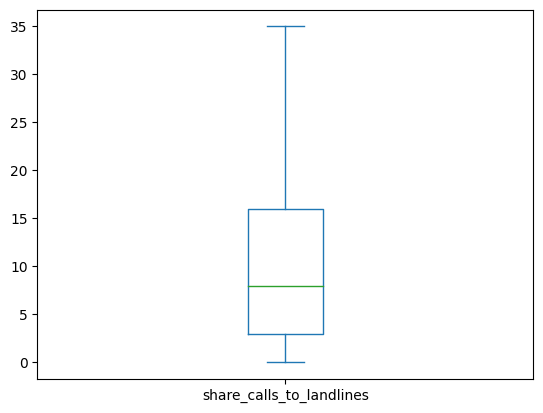

In [88]:
_, bp = df1['share_calls_to_landlines'].plot.box(return_type='both')

In [89]:
#проверить наличие дублирующихся записей;
df1.duplicated().sum()

0

In [90]:
df1['monthly_expense'] = df1['monthly_expense'].fillna(df1['monthly_expense'].median())
df1['average_duration_conversations'] = df1['average_duration_conversations'].fillna(df1['average_duration_conversations'].median())
df1['daily_calls_per_month'] = df1['daily_calls_per_month'].fillna(df1['daily_calls_per_month'].median())
df1['evening_calls_per_month'] = df1['evening_calls_per_month'].fillna(df1['evening_calls_per_month'].median())

In [91]:
# заполнение пропусков
df1.isnull().sum()

age                               0
monthly_expense                   0
average_duration_conversations    0
daily_calls_per_month             0
evening_calls_per_month           0
night_calls_per_mouth             0
other_cities_calls                0
share_calls_to_landlines          0
sms_messages_per_month            0
tariff_activation_date            0
dtype: int64

In [92]:
df1

age  monthly_expense  average_duration_conversations  \
0      24           315.51                             2.4   
1      51           287.51                             1.7   
2      41           113.70                             2.1   
3      35           410.23                             5.6   
4      26           537.60                             4.8   
...   ...              ...                             ...   
4487   40           186.20                             3.7   
4488   40           500.68                             6.0   
4489   60           470.42                             3.5   
4490   38           858.99                             9.3   
4491   33           151.92                             1.5   

      daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
0                      12.0                     65.0                      5   
1                     111.0                    109.0                      1   
2                      41.0                     27.0                      0   
3                      47.0                     49.0                      0   
4                      58.0                     77.0                      4   
...                     ...                      ...                    ...   
4487                   36.0                     28.0                      2   
4488                   46.0                     66.0                      0   
4489                   58.0                    129.0                      2   
4490                   50.0                     74.0                      0   
4491                   59.0                     75.0                      2   

      other_cities_calls  share_calls_to_landlines  sms_messages_per_month  \
0                      0                         5                      56   
1                     30                         6                       1   
2                      0                         1                      36   
3                      0                        11                      23   
4                      0                        16                      29   
...                  ...                       ...                     ...   
4487                   6                        12                      30   
4488                   6                        15                      23   
4489                   4                        19                       5   
4490                   0                        28                      69   
4491                   1                         8                      24   

     tariff_activation_date  
0       2018-06-17 12:14:35  
1       2021-10-21 15:39:54  
2       2015-03-26 11:26:15  
3       2016-01-04 15:53:20  
4       2017-05-03 13:33:53  
...                     ...  
4487    2021-04-10 14:58:23  
4488    2021-09-22 14:52:43  
4489    2019-04-04 17:33:38  
4490    2015-12-30 16:28:26  
4491    2019-04-14 11:59:10  

[4492 rows x 10 columns]

# Шаг 2

In [93]:
obj_names = [(df1.age <= 24),
             (df1.age.between (25, 33)),
             (df1.age.between (34, 56)),
             (df1.age >= 57)]
values = ['студент', 'аспирант', 'бизнесмен', 'знаток']
df1['age_category'] = np.select(obj_names, values)
df1.head(3)

age  monthly_expense  average_duration_conversations  \
0   24           315.51                             2.4   
1   51           287.51                             1.7   
2   41           113.70                             2.1   

   daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
0                   12.0                     65.0                      5   
1                  111.0                    109.0                      1   
2                   41.0                     27.0                      0   

   other_cities_calls  share_calls_to_landlines  sms_messages_per_month  \
0                   0                         5                      56   
1                  30                         6                       1   
2                   0                         1                      36   

  tariff_activation_date age_category  
0    2018-06-17 12:14:35      студент  
1    2021-10-21 15:39:54    бизнесмен  
2    2015-03-26 11:26:15    бизнесмен

In [94]:
df1.head(10)

age  monthly_expense  average_duration_conversations  \
0   24           315.51                             2.4   
1   51           287.51                             1.7   
2   41           113.70                             2.1   
3   35           410.23                             5.6   
4   26           537.60                             4.8   
5   26           324.56                             3.3   
6   50           410.04                             4.1   
7   66            14.52                             1.1   
8   36           209.12                             2.5   
9   40           162.40                             1.6   

   daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
0                   12.0                     65.0                      5   
1                  111.0                    109.0                      1   
2                   41.0                     27.0                      0   
3                   47.0                     49.0                      0   
4                   58.0                     77.0                      4   
5                   45.0                     75.0                      3   
6                   61.0                     71.0                      0   
7                   10.0                      1.0                      0   
8                   34.0                     70.0                      3   
9                   79.0                     32.0                      4   

   other_cities_calls  share_calls_to_landlines  sms_messages_per_month  \
0                   0                         5                      56   
1                  30                         6                       1   
2                   0                         1                      36   
3                   0                        11                      23   
4                   0                        16                      29   
5                   1                         8                      15   
6                   0                        23                       4   
7                   0                         3                       1   
8                   2                         7                      63   
9                   0                        18                      27   

  tariff_activation_date age_category  
0    2018-06-17 12:14:35      студент  
1    2021-10-21 15:39:54    бизнесмен  
2    2015-03-26 11:26:15    бизнесмен  
3    2016-01-04 15:53:20    бизнесмен  
4    2017-05-03 13:33:53     аспирант  
5    2016-11-13 15:53:16     аспирант  
6    2017-07-19 16:02:01    бизнесмен  
7    2015-04-27 15:25:42       знаток  
8    2017-03-03 12:27:05    бизнесмен  
9    2019-05-22 10:22:37    бизнесмен

In [95]:
df1['year'] = df1.tariff_activation_date.dt.year
df1['month'] = df1.tariff_activation_date.dt.strftime('%Y-%m')
df1['dates'] = df1['tariff_activation_date'].dt.date
df1.head(10)

age  monthly_expense  average_duration_conversations  \
0   24           315.51                             2.4   
1   51           287.51                             1.7   
2   41           113.70                             2.1   
3   35           410.23                             5.6   
4   26           537.60                             4.8   
5   26           324.56                             3.3   
6   50           410.04                             4.1   
7   66            14.52                             1.1   
8   36           209.12                             2.5   
9   40           162.40                             1.6   

   daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
0                   12.0                     65.0                      5   
1                  111.0                    109.0                      1   
2                   41.0                     27.0                      0   
3                   47.0                     49.0                      0   
4                   58.0                     77.0                      4   
5                   45.0                     75.0                      3   
6                   61.0                     71.0                      0   
7                   10.0                      1.0                      0   
8                   34.0                     70.0                      3   
9                   79.0                     32.0                      4   

   other_cities_calls  share_calls_to_landlines  sms_messages_per_month  \
0                   0                         5                      56   
1                  30                         6                       1   
2                   0                         1                      36   
3                   0                        11                      23   
4                   0                        16                      29   
5                   1                         8                      15   
6                   0                        23                       4   
7                   0                         3                       1   
8                   2                         7                      63   
9                   0                        18                      27   

  tariff_activation_date age_category  year    month       dates  
0    2018-06-17 12:14:35      студент  2018  2018-06  2018-06-17  
1    2021-10-21 15:39:54    бизнесмен  2021  2021-10  2021-10-21  
2    2015-03-26 11:26:15    бизнесмен  2015  2015-03  2015-03-26  
3    2016-01-04 15:53:20    бизнесмен  2016  2016-01  2016-01-04  
4    2017-05-03 13:33:53     аспирант  2017  2017-05  2017-05-03  
5    2016-11-13 15:53:16     аспирант  2016  2016-11  2016-11-13  
6    2017-07-19 16:02:01    бизнесмен  2017  2017-07  2017-07-19  
7    2015-04-27 15:25:42       знаток  2015  2015-04  2015-04-27  
8    2017-03-03 12:27:05    бизнесмен  2017  2017-03  2017-03-03  
9    2019-05-22 10:22:37    бизнесмен  2019  2019-05  2019-05-22

In [96]:
#Провести исследовательский анализ данных:
#в разрезе значений признаков Год подключения, Месяц подключения, Дата подключения исследуйте:
#динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?

In [97]:
df1

age  monthly_expense  average_duration_conversations  \
0      24           315.51                             2.4   
1      51           287.51                             1.7   
2      41           113.70                             2.1   
3      35           410.23                             5.6   
4      26           537.60                             4.8   
...   ...              ...                             ...   
4487   40           186.20                             3.7   
4488   40           500.68                             6.0   
4489   60           470.42                             3.5   
4490   38           858.99                             9.3   
4491   33           151.92                             1.5   

      daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
0                      12.0                     65.0                      5   
1                     111.0                    109.0                      1   
2                      41.0                     27.0                      0   
3                      47.0                     49.0                      0   
4                      58.0                     77.0                      4   
...                     ...                      ...                    ...   
4487                   36.0                     28.0                      2   
4488                   46.0                     66.0                      0   
4489                   58.0                    129.0                      2   
4490                   50.0                     74.0                      0   
4491                   59.0                     75.0                      2   

      other_cities_calls  share_calls_to_landlines  sms_messages_per_month  \
0                      0                         5                      56   
1                     30                         6                       1   
2                      0                         1                      36   
3                      0                        11                      23   
4                      0                        16                      29   
...                  ...                       ...                     ...   
4487                   6                        12                      30   
4488                   6                        15                      23   
4489                   4                        19                       5   
4490                   0                        28                      69   
4491                   1                         8                      24   

     tariff_activation_date age_category  year    month       dates  
0       2018-06-17 12:14:35      студент  2018  2018-06  2018-06-17  
1       2021-10-21 15:39:54    бизнесмен  2021  2021-10  2021-10-21  
2       2015-03-26 11:26:15    бизнесмен  2015  2015-03  2015-03-26  
3       2016-01-04 15:53:20    бизнесмен  2016  2016-01  2016-01-04  
4       2017-05-03 13:33:53     аспирант  2017  2017-05  2017-05-03  
...                     ...          ...   ...      ...         ...  
4487    2021-04-10 14:58:23    бизнесмен  2021  2021-04  2021-04-10  
4488    2021-09-22 14:52:43    бизнесмен  2021  2021-09  2021-09-22  
4489    2019-04-04 17:33:38       знаток  2019  2019-04  2019-04-04  
4490    2015-12-30 16:28:26    бизнесмен  2015  2015-12  2015-12-30  
4491    2019-04-14 11:59:10     аспирант  2019  2019-04  2019-04-14  

[4492 rows x 14 columns]

In [98]:
coun_year = df1.groupby(['year']).agg({'tariff_activation_date': 'count'}).reset_index()
coun_year


year  tariff_activation_date
0  2015                     588
1  2016                     652
2  2017                     678
3  2018                     677
4  2019                     601
5  2020                     648
6  2021                     648

In [99]:
fig = px.bar(coun_year, x='year', y='tariff_activation_date', color = 'tariff_activation_date',
             barmode="group", text_auto = True)
fig.show()

In [100]:
coun_month = df1.groupby(['month']).agg({'tariff_activation_date': 'count'}).reset_index()
coun_month

month  tariff_activation_date
0   2015-01                      35
1   2015-02                      61
2   2015-03                      41
3   2015-04                      50
4   2015-05                      54
..      ...                     ...
79  2021-08                      67
80  2021-09                      64
81  2021-10                      47
82  2021-11                      50
83  2021-12                      41

[84 rows x 2 columns]

In [101]:
fig = px.bar(coun_month, x='month', y='tariff_activation_date',
             color = 'tariff_activation_date', text_auto = True )
fig.show()

In [102]:
coun_day = df1.groupby(['dates']).agg({'tariff_activation_date': 'count'}).reset_index()
coun_day

dates  tariff_activation_date
0     2015-01-01                       1
1     2015-01-04                       1
2     2015-01-05                       1
3     2015-01-06                       2
4     2015-01-07                       1
...          ...                     ...
2136  2021-12-26                       2
2137  2021-12-27                       2
2138  2021-12-28                       3
2139  2021-12-30                       2
2140  2021-12-31                       1

[2141 rows x 2 columns]

In [104]:
fig = px.line(coun_day, x='dates', y='tariff_activation_date', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Статистический Вывод : В разрезе признаков Год, месяц, день. можно сделать вывод, что:

- по признаку год - больше всего подключались в 2018 = 678 человек, меньше всего - 2015 = 588. Согласно выстроенному графику по годам динамика подключения сохраняется стабильной.

- по признаку месяц - больше всего подключились в август 2016 = 68,  меньше всего - март  и сентябре 2015 года = по 35 чел... Согласно графику по месяцам мы можем сказать, что динамика подключений сохраняется стабильно.

- по датам подключения лидируют следующие даты: февраль 2015, ноябрь 2015, декабрь 2017 , февраль 2020 по 7 человек и в месяцах июнь, июль, август 2021 повторяется пик который прослеживался по вышесказаным месяцам = 7 человек.

# Вывод
- большая часть клиентов подключались по годам 2018 и меньше всего в 2015;
- по месяцам: больше в август 2016 = 68, меньше март  и сентябре 2015 года = по 35 чел;
- по датам подключения лидируют следующие даты: февраль 2015, ноябрь 2015, декабрь 2017 , февраль 2020 по 7 человек и в месяцах июнь, июль, август 2021 повторяется пик который прослеживался по вышесказаным месяцам = 7 человек.

На протяжении всей временной линии прослеживается стабильный приток клиент и под конец 2021 год появился спад клиентов.

In [105]:
#В разрезе значений признака Возрастная категория исследуйте распределение признаков:
#Среднемесячный расход, Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города, Доля звонков на стационарные телефоны, Количество SMS за месяц.
#Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики.
# Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);

In [106]:
dis_var = ['monthly_expense','average_duration_conversations', 'daily_calls_per_month',
 'evening_calls_per_month', 'night_calls_per_mouth', 'other_cities_calls',
 'share_calls_to_landlines', 'sms_messages_per_month']

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   age                             4492 non-null   int64         
 1   monthly_expense                 4492 non-null   float64       
 2   average_duration_conversations  4492 non-null   float64       
 3   daily_calls_per_month           4492 non-null   float64       
 4   evening_calls_per_month         4492 non-null   float64       
 5   night_calls_per_mouth           4492 non-null   int64         
 6   other_cities_calls              4492 non-null   int64         
 7   share_calls_to_landlines        4492 non-null   int64         
 8   sms_messages_per_month          4492 non-null   int64         
 9   tariff_activation_date          4492 non-null   datetime64[ns]
 10  age_category                    4492 non-null   object        
 11  year

In [108]:
for col_name in dis_var:
    print("""Признак {}
    медиана {}
    среднее {}
    мода {}""".format(col_name,
                            (df1[col_name].median()),
                            (df1[col_name].mean()),
                            (df1[col_name].mode()[0])
                            ))

Признак monthly_expense
    медиана 315.51
    среднее 424.95754897595725
    мода 1270.16
Признак average_duration_conversations
    медиана 3.3
    среднее 4.227304096170971
    мода 2.4
Признак daily_calls_per_month
    медиана 53.0
    среднее 54.897150489759575
    мода 114.0
Признак evening_calls_per_month
    медиана 71.0
    среднее 70.36420302760463
    мода 3.0
Признак night_calls_per_mouth
    медиана 1.0
    среднее 3.052315227070347
    мода 0
Признак other_cities_calls
    медиана 2.0
    среднее 7.655609973285841
    мода 0
Признак share_calls_to_landlines
    медиана 8.0
    среднее 10.184550311665182
    мода 0
Признак sms_messages_per_month
    медиана 6.0
    среднее 19.598842386464828
    мода 0


In [109]:
list(dis_var)

['monthly_expense',
 'average_duration_conversations',
 'daily_calls_per_month',
 'evening_calls_per_month',
 'night_calls_per_mouth',
 'other_cities_calls',
 'share_calls_to_landlines',
 'sms_messages_per_month']

In [111]:
eng_to_rus = {'monthly_expense': 'средний расход',
              'average_duration_conversations': 'средняя продолжительность разговора',
              'daily_calls_per_month': 'звонки за день в месяц',
              'evening_calls_per_month': 'звонки вечером в месяц',
              'night_calls_per_mouth': 'звонки ночью в месяц',
              'other_cities_calls': 'звонки в другие города',
              'share_calls_to_landlines': 'звонки-станционар',
              'sms_messages_per_month': 'смс за месяц'
              }

<ipython-input-112-29ac456d3252>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-112-29ac456d3252>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-112-29ac456d3252>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

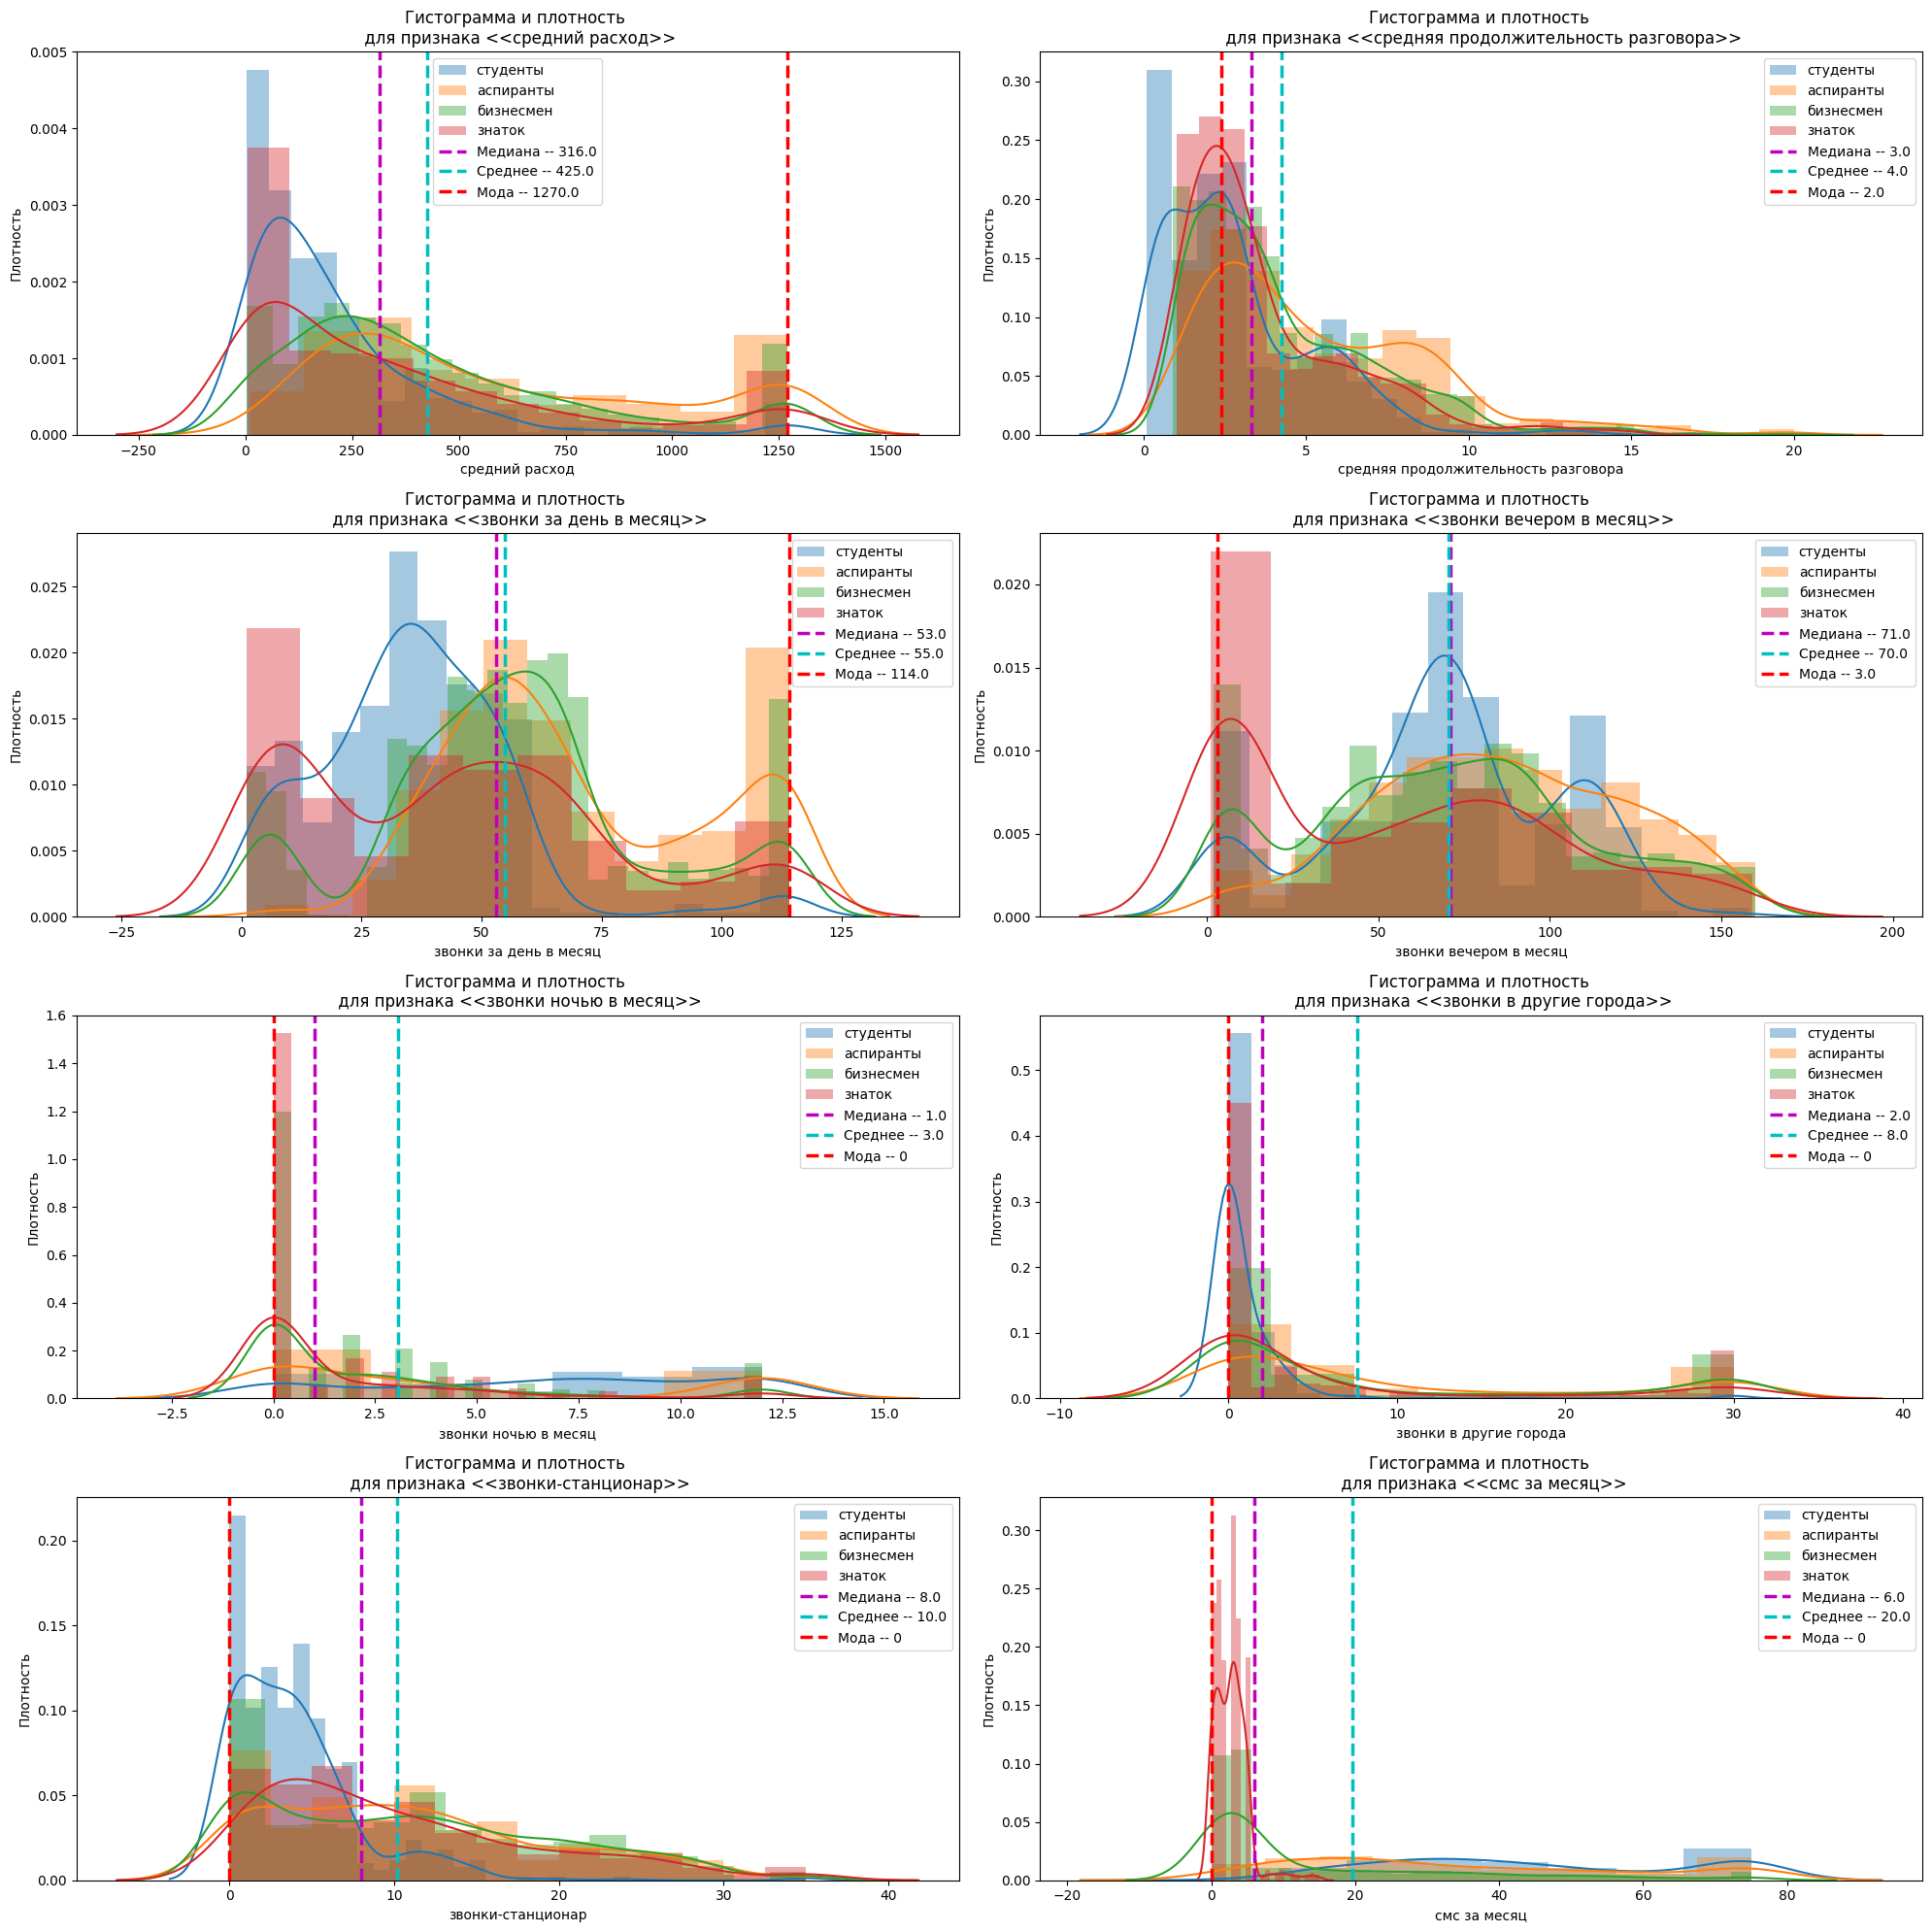

In [112]:
fig, axes = plt.subplots(4, 2, figsize=(20,20))
for i, col in enumerate(dis_var):
    plt.subplot(4,2,i+1)
    ax = sns.distplot(df1[df1.age_category == 'студент'][col], label = 'студенты',)
    ax = sns.distplot(df1[df1.age_category == 'аспирант'][col], label = 'аспиранты')
    ax = sns.distplot(df1[df1.age_category == 'бизнесмен'][col], label = 'бизнесмен')
    ax = sns.distplot(df1[df1.age_category == 'знаток'][col], label = 'знаток')
    plt.axvline(x=df1[col].median(), color='m', ls='--',
            lw=2.5,
            label = 'Медиана -- {}'.format(np.round(df1[col].median())))
    plt.axvline(x=df1[col].mean(), color='c', ls='--',
            lw=2.5,
            label = 'Среднее -- {}'.format(np.round(df1[col].mean())))
    plt.axvline(x=df1[col].mode()[0], color='r', ls='--',
            lw=2.5,
            label = 'Мода -- {}'.format(np.round(df1[col].mode()[0])))
    plt.title("Гистограмма и плотность \n для признака <<{}>>".format(eng_to_rus[col]))
    plt.xlabel(eng_to_rus[col])
    plt.ylabel('Плотность')
    plt.tight_layout()
    plt.legend()

In [113]:
x = df1.evening_calls_per_month.dropna()
y =df1.daily_calls_per_month.dropna()

In [114]:
day_mean = df1.daily_calls_per_month.dropna().mean()
eve_mean = df1.evening_calls_per_month.dropna().mean()
print(day_mean)
print(eve_mean)

54.897150489759575
70.36420302760463


In [115]:
# h0 - клиенты звонят одинаково звонят как днем так и вечером
# h1 - значения звонков клиентов как днем так и вечером не равны
mannwhitneyu(df1.evening_calls_per_month.dropna(), df1.daily_calls_per_month.dropna())
# согласно закону распределения Манна-Уитни различий между двумя независимыми выборками pvalue - 3.5833263675482197e-87 < a значит h0 отвергается

MannwhitneyuResult(statistic=12521446.5, pvalue=3.5833263675482197e-87)

In [116]:
hist_data = [x, y]
group_labels = ['day', 'evening']
colors = ['#A56CC1', '#63F5EF']
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=1, show_rug=False)
fig.update_layout(title_text='Гистограмма распределения плотности признаков')
fig.add_vline(x = day_mean, annotation_text="Среднее звонков за день = 54.8",
              annotation_position="top left",
              fillcolor="red", opacity=1, line_width=2)
fig.add_vline(x = eve_mean, annotation_text="Среднее звонков за вечер = 70.3",
              annotation_position="top right",
              fillcolor="red", opacity=1, line_width=2)
fig.show()

In [117]:
# h0 - клиенты звонят звонят днем больше чем вечером
# h1 - клиенты звонят днем меньше чем вечером
mannwhitneyu(df1.evening_calls_per_month.dropna(), df1.daily_calls_per_month.dropna(), alternative='greater') # x < y
# h0 отвергаем, pvalue=1.7916631837741098e-87 < a

MannwhitneyuResult(statistic=12521446.5, pvalue=1.7916631837741098e-87)

In [118]:
list(df1.columns)

['age',
 'monthly_expense',
 'average_duration_conversations',
 'daily_calls_per_month',
 'evening_calls_per_month',
 'night_calls_per_mouth',
 'other_cities_calls',
 'share_calls_to_landlines',
 'sms_messages_per_month',
 'tariff_activation_date',
 'age_category',
 'year',
 'month',
 'dates']

In [119]:
x1 = df1[df1.age_category == 'студент'].daily_calls_per_month.dropna()
y1 = df1[df1.age_category == 'аспирант'].daily_calls_per_month.dropna()

In [120]:
#h0 клиенты возрастной категории студенты и аспиранты совершают одинаковое количество звонков днем
#h1 клиенты возрастной категории студентов и аспиранты совершают не равное количество звонков днем
mannwhitneyu(df1[df1.age_category == 'студент'].daily_calls_per_month.dropna(), df1[df1.age_category == 'аспирант'].daily_calls_per_month.dropna())
# pvalue=3.192728560451257e-109 < a, h0 отвергается

MannwhitneyuResult(statistic=60560.5, pvalue=3.192728560451257e-109)

In [121]:
stud_mean = df1[df1.age_category == 'студент'].daily_calls_per_month.dropna().mean()
aspir_mean = df1[df1.age_category == 'аспирант'].daily_calls_per_month.dropna().mean()
print(stud_mean)
print(aspir_mean)

35.93036750483559
69.90854392298435


In [122]:
hist_data1 = [x1, y1]
group_labels = ['студент', 'аспирант']
colors = ['#A56CC1', '#63F5EF']
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=1, show_rug=False)
fig.update_layout(title_text='Гистограмма распределения плотности признаков')
fig.add_vline(x = day_mean, annotation_text="Среднее звонков студентов за день = 35.9",
              annotation_position="top left",
              fillcolor="red", opacity=1, line_width=2)
fig.add_vline(x = eve_mean, annotation_text="Среднее звонков аспирантов за день = 69.9",
              annotation_position="top right",
              fillcolor="red", opacity=1, line_width=2)
fig.show()

In [123]:
#h0 клиенты возрастной категории студенты совершают большее количество звонков днем чем аспиранты
#h1 клиенты возрастной категории студентов совершают меньшее количество звонков днем чем аспиранты
mannwhitneyu(df1[df1.age_category == 'студент'].daily_calls_per_month.dropna(),
             df1[df1.age_category == 'аспирант'].daily_calls_per_month.dropna(), alternative='less') # x > y
# pvalue=1.5963642802256286e-109 < a, h0 отвергается

MannwhitneyuResult(statistic=60560.5, pvalue=1.5963642802256286e-109)

# ВЫВОД
о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток)
------
Согласно выведенным статистикам мы можем сказать что:
- Средняя продолжительность звонков клиентов не привышает 5 минут.
- Клиенты совершают звонки в дневное и вечернее время, в ночное время производится наименьшее количество звонков.
- Возрастные категории:
студенты, аспиранты и бизнесмены активное пользуются услугами SMS, возрастная категория знатоки реже пользуются услугами SMS

- Мало клиентов пользуются услугой звонки между городами и звонками со станционарных телефонов
- Пользователи, использующие услугами смс сообщениями являются: студенты, бизнесмены и аспиранты

In [124]:
#клиенты каких возрастных категорий (ТОП-2):
#больше всего в среднем в месяц тратят на оплату услуг связи;
#больше всего тратят времени на общение в месяц днем, вечером и ночью;
#больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

In [125]:
top_age_category = df1.groupby('age_category', as_index=False).agg({'monthly_expense':'sum'}).round()
top_age_category1 = top_age_category.sort_values(by='monthly_expense', ascending = False)
top_age_category1
top2_age_category1 = top_age_category1.head(2)
top2_age_category1
fig = px.bar(top2_age_category1, x='age_category', y='monthly_expense',
             color='age_category', width = 900, height = 550, text='monthly_expense')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Топ-2 возрастных категорий в месяц тратят на оплату услуг связи',
    xaxis_title="возрастная категория",
    yaxis_title="количество затрат")
fig.show()

In [126]:
df1['sum_calls'] = df1['daily_calls_per_month'] + df1['evening_calls_per_month'] + df1['night_calls_per_mouth']
df1['sum_calls'] = df1['sum_calls'] * df1['average_duration_conversations']
df1

age  monthly_expense  average_duration_conversations  \
0      24           315.51                             2.4   
1      51           287.51                             1.7   
2      41           113.70                             2.1   
3      35           410.23                             5.6   
4      26           537.60                             4.8   
...   ...              ...                             ...   
4487   40           186.20                             3.7   
4488   40           500.68                             6.0   
4489   60           470.42                             3.5   
4490   38           858.99                             9.3   
4491   33           151.92                             1.5   

      daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
0                      12.0                     65.0                      5   
1                     111.0                    109.0                      1   
2                      41.0                     27.0                      0   
3                      47.0                     49.0                      0   
4                      58.0                     77.0                      4   
...                     ...                      ...                    ...   
4487                   36.0                     28.0                      2   
4488                   46.0                     66.0                      0   
4489                   58.0                    129.0                      2   
4490                   50.0                     74.0                      0   
4491                   59.0                     75.0                      2   

      other_cities_calls  share_calls_to_landlines  sms_messages_per_month  \
0                      0                         5                      56   
1                     30                         6                       1   
2                      0                         1                      36   
3                      0                        11                      23   
4                      0                        16                      29   
...                  ...                       ...                     ...   
4487                   6                        12                      30   
4488                   6                        15                      23   
4489                   4                        19                       5   
4490                   0                        28                      69   
4491                   1                         8                      24   

     tariff_activation_date age_category  year    month       dates  sum_calls  
0       2018-06-17 12:14:35      студент  2018  2018-06  2018-06-17      196.8  
1       2021-10-21 15:39:54    бизнесмен  2021  2021-10  2021-10-21      375.7  
2       2015-03-26 11:26:15    бизнесмен  2015  2015-03  2015-03-26      142.8  
3       2016-01-04 15:53:20    бизнесмен  2016  2016-01  2016-01-04      537.6  
4       2017-05-03 13:33:53     аспирант  2017  2017-05  2017-05-03      667.2  
...                     ...          ...   ...      ...         ...        ...  
4487    2021-04-10 14:58:23    бизнесмен  2021  2021-04  2021-04-10      244.2  
4488    2021-09-22 14:52:43    бизнесмен  2021  2021-09  2021-09-22      672.0  
4489    2019-04-04 17:33:38       знаток  2019  2019-04  2019-04-04      661.5  
4490    2015-12-30 16:28:26    бизнесмен  2015  2015-12  2015-12-30     1153.2  
4491    2019-04-14 11:59:10     аспирант  2019  2019-04  2019-04-14      204.0  

[4492 rows x 15 columns]

In [127]:
top_age_calls = df1.groupby('age_category', as_index=False).agg({'sum_calls':'sum'}).round()
top_age_calls1 = top_age_calls.sort_values(by='sum_calls', ascending = False)
top2_age_calls1 = top_age_calls1.head(2)
top2_age_calls1
fig = px.bar(top2_age_calls1, x='age_category', y='sum_calls',
             color='age_category', width = 900, height = 550, text='sum_calls')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Топ-2 возрастных категорий в месяц тратят времени на общение в мин',
    xaxis_title="возрастная категория",
    yaxis_title="количество минут")
fig.show()

In [128]:
df1['sum_calls'] = df1['sum_calls'] / df1['average_duration_conversations']
df1

age  monthly_expense  average_duration_conversations  \
0      24           315.51                             2.4   
1      51           287.51                             1.7   
2      41           113.70                             2.1   
3      35           410.23                             5.6   
4      26           537.60                             4.8   
...   ...              ...                             ...   
4487   40           186.20                             3.7   
4488   40           500.68                             6.0   
4489   60           470.42                             3.5   
4490   38           858.99                             9.3   
4491   33           151.92                             1.5   

      daily_calls_per_month  evening_calls_per_month  night_calls_per_mouth  \
0                      12.0                     65.0                      5   
1                     111.0                    109.0                      1   
2                      41.0                     27.0                      0   
3                      47.0                     49.0                      0   
4                      58.0                     77.0                      4   
...                     ...                      ...                    ...   
4487                   36.0                     28.0                      2   
4488                   46.0                     66.0                      0   
4489                   58.0                    129.0                      2   
4490                   50.0                     74.0                      0   
4491                   59.0                     75.0                      2   

      other_cities_calls  share_calls_to_landlines  sms_messages_per_month  \
0                      0                         5                      56   
1                     30                         6                       1   
2                      0                         1                      36   
3                      0                        11                      23   
4                      0                        16                      29   
...                  ...                       ...                     ...   
4487                   6                        12                      30   
4488                   6                        15                      23   
4489                   4                        19                       5   
4490                   0                        28                      69   
4491                   1                         8                      24   

     tariff_activation_date age_category  year    month       dates  sum_calls  
0       2018-06-17 12:14:35      студент  2018  2018-06  2018-06-17       82.0  
1       2021-10-21 15:39:54    бизнесмен  2021  2021-10  2021-10-21      221.0  
2       2015-03-26 11:26:15    бизнесмен  2015  2015-03  2015-03-26       68.0  
3       2016-01-04 15:53:20    бизнесмен  2016  2016-01  2016-01-04       96.0  
4       2017-05-03 13:33:53     аспирант  2017  2017-05  2017-05-03      139.0  
...                     ...          ...   ...      ...         ...        ...  
4487    2021-04-10 14:58:23    бизнесмен  2021  2021-04  2021-04-10       66.0  
4488    2021-09-22 14:52:43    бизнесмен  2021  2021-09  2021-09-22      112.0  
4489    2019-04-04 17:33:38       знаток  2019  2019-04  2019-04-04      189.0  
4490    2015-12-30 16:28:26    бизнесмен  2015  2015-12  2015-12-30      124.0  
4491    2019-04-14 11:59:10     аспирант  2019  2019-04  2019-04-14      136.0  

[4492 rows x 15 columns]

In [129]:
top_age_calls = df1.groupby('age_category', as_index=False).agg({'sum_calls':'sum'}).round()
top_age_calls1 = top_age_calls.sort_values(by='sum_calls', ascending = False)
top2_age_calls1 = top_age_calls1.head(2)
top2_age_calls1
fig = px.bar(top2_age_calls1, x='age_category', y='sum_calls',
             color='age_category', width = 900, height = 550, text='sum_calls')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Топ-2 возрастных категорий в месяц по количеству звонков ',
    xaxis_title="возрастная категория",
    yaxis_title="количество звонков")
fig.show()

# ВЫВОД
- Согласно выведенным графикам мы можем сказать что бизнесмены занимают первое места по пунктам:

1) больше всего в среднем в месяц тратят на оплату услуг связи ;

2)больше всего тратят времени на общение в месяц днем, вечером и ночью;

3)больше всего по количеству звонков в месяц днем, вечером и ночью.

2 и 3 пункты совпадают по результатам анализа, НО разнятся по значениям

Шаг 3
- C помощью диаграмм рассеивания исследуейте зависимости между признаками:

- Среднемесячный расход, Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города, Доля звонков на стационарные телефоны, Количество SMS за месяц.

- Какие выводы можно сделать?

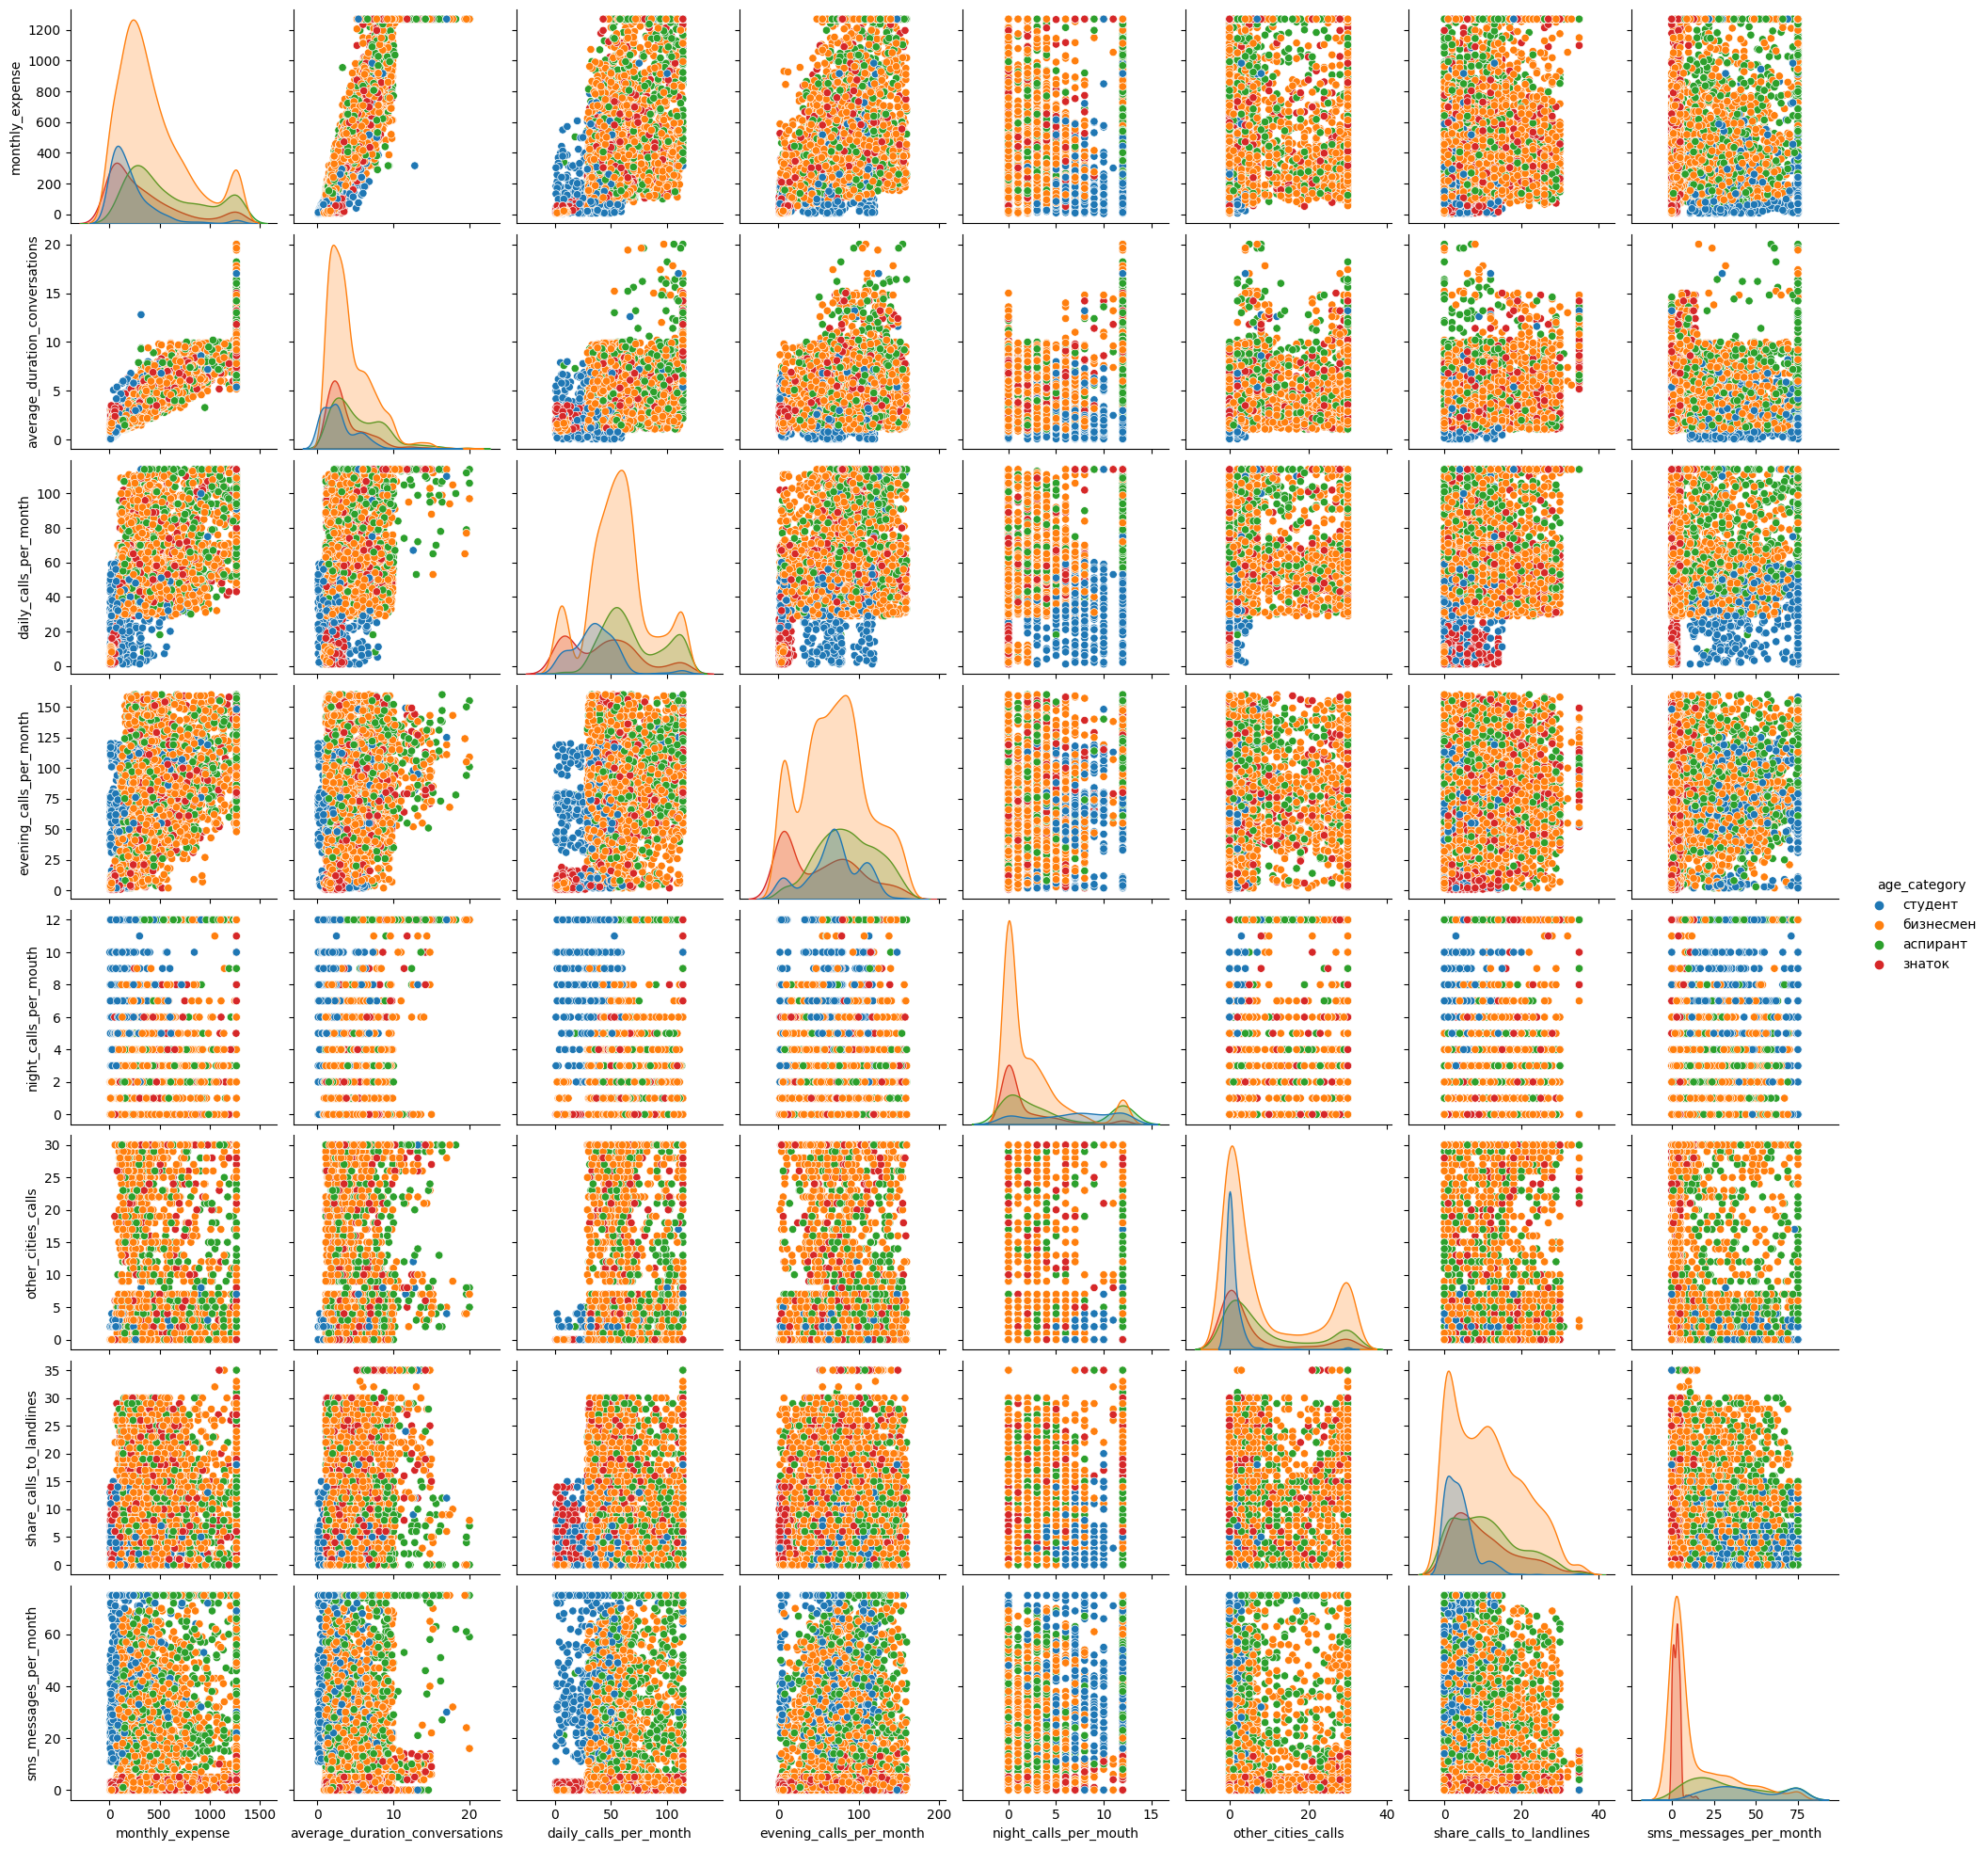

In [130]:
sns.pairplot(data = df1,
            vars =['monthly_expense',
                   'average_duration_conversations',
                   'daily_calls_per_month',
                   'evening_calls_per_month',
                   'night_calls_per_mouth',
                   'other_cities_calls',
                   'share_calls_to_landlines',
                   'sms_messages_per_month'],
             hue ='age_category')

<ipython-input-74-2db6d23e5fd3>:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

<ipython-input-74-2db6d23e5fd3>:7: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

<ipython-input-74-2db6d23e5fd3>:12: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

<ipython-input-74-2db6d23e5fd3>:17: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



Text(0, 0.5, 'monthly_expense')

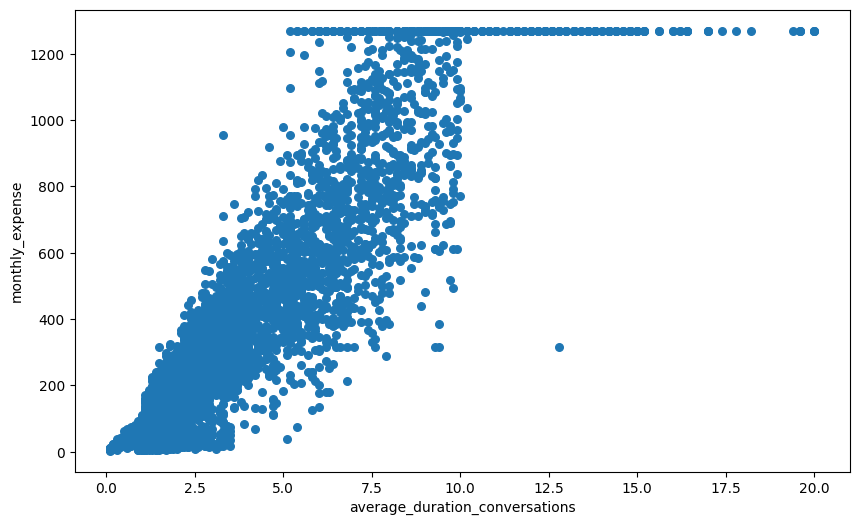

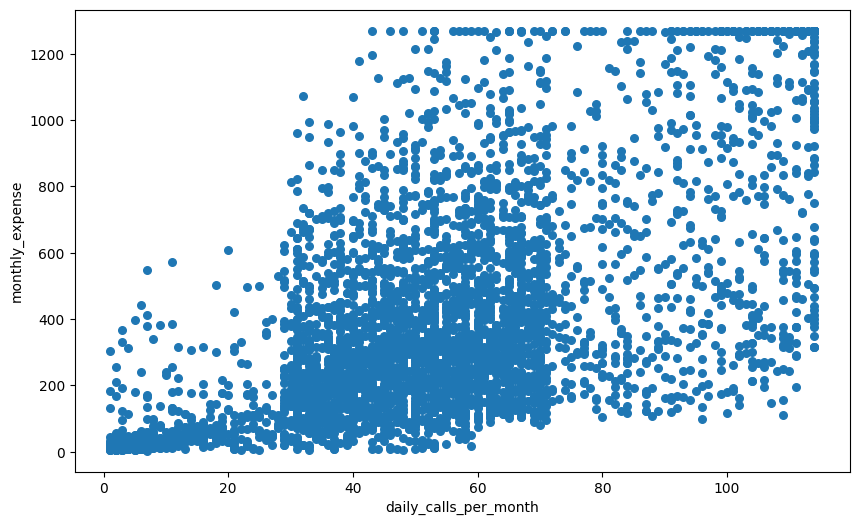

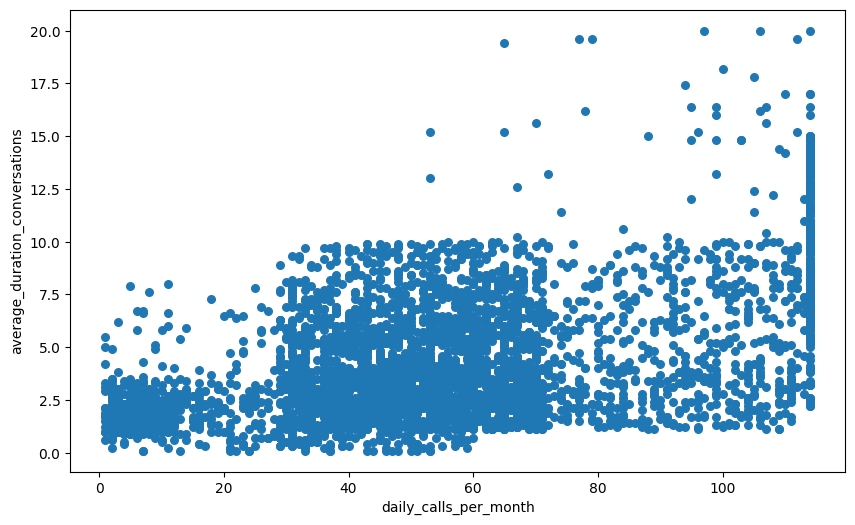

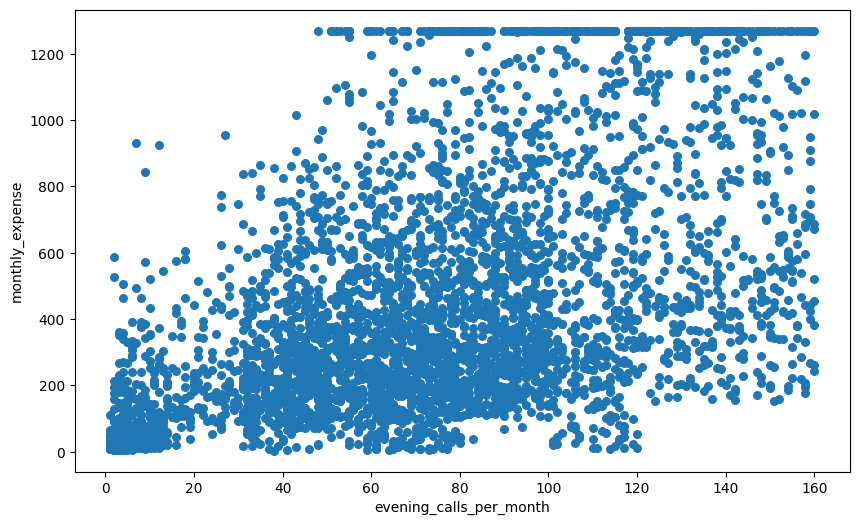

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df1['average_duration_conversations'], y = df1['monthly_expense'], s=30, cmap='Greens_r')
plt.xlabel("average_duration_conversations")
plt.ylabel("monthly_expense")

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df1['daily_calls_per_month'], y = df1['monthly_expense'], s=30, cmap='Greens_r')
plt.xlabel("daily_calls_per_month")
plt.ylabel("monthly_expense")

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df1['daily_calls_per_month'], y = df1['average_duration_conversations'], s=30, cmap='Greens_r')
plt.xlabel("daily_calls_per_month")
plt.ylabel("average_duration_conversations")

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df1['evening_calls_per_month'], y = df1['monthly_expense'], s=30, cmap='Greens_r')
plt.xlabel("evening_calls_per_month")
plt.ylabel("monthly_expense")

<ipython-input-78-80367a8462bb>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-78-80367a8462bb>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



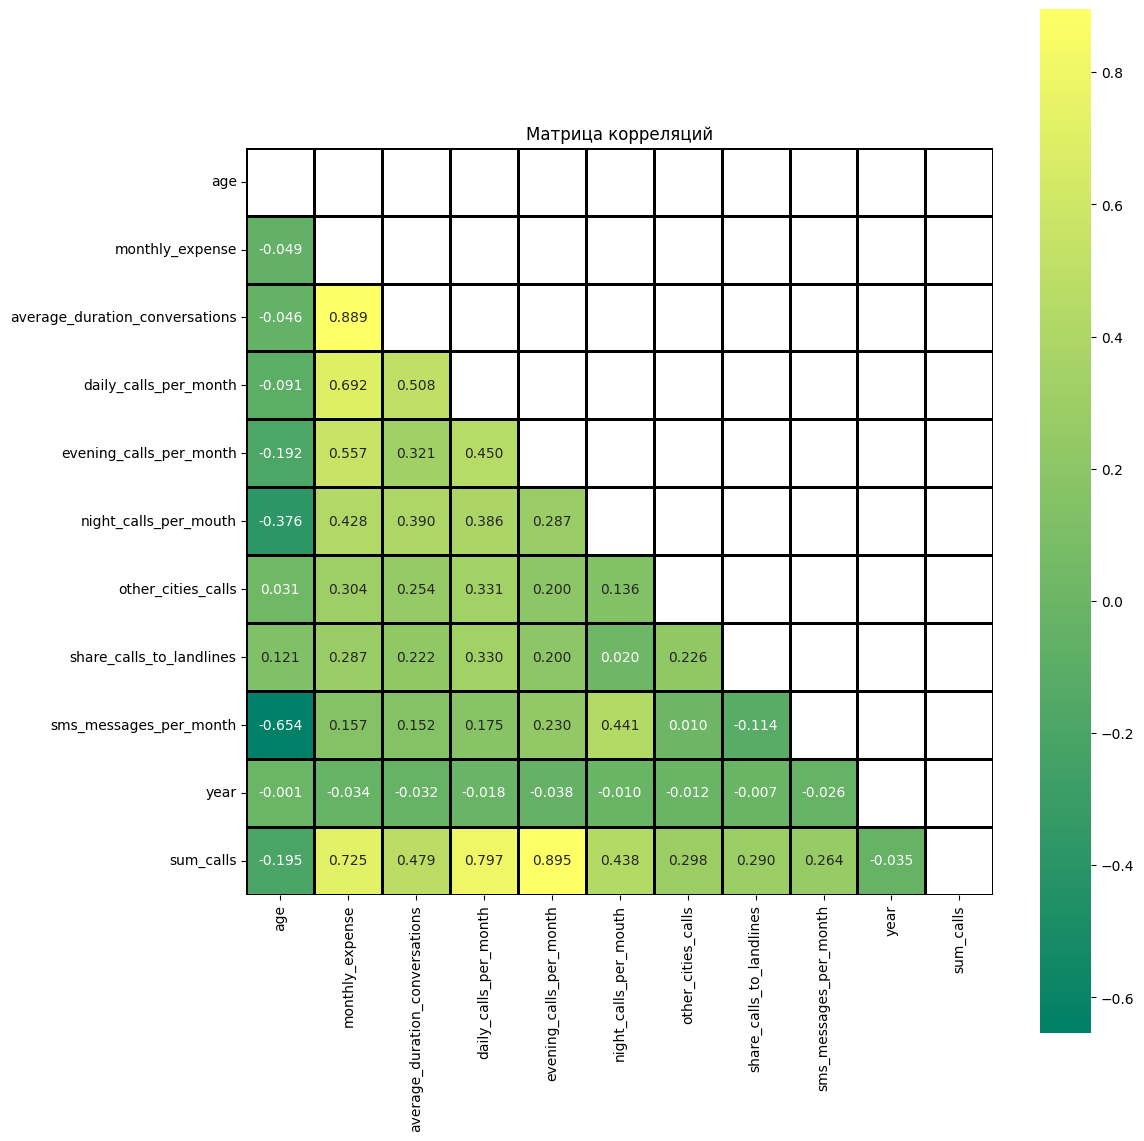

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df1.corr(), annot=True, square=True,
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df1.corr()))
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

# ВЫВОД
- Согласно выведенным диаграмам рассеивания мы можем вывести следующие выводы:

1) продолжительность разговора и средний расход

2) дневные звоник и средний расход

3) дневные звонки и продолжительность разговора

4) вечерние звонки и средний расход

- первая группа признаков имеет высокую линнейную зависимость

- остальные группы имеют умереную зависимость друг от друга.

Свои доводы мы подкрепляем выстроенной матрицей корелиации зависимости в которой мы обнаружили что 1 группа = 0.889 - что означает имеется взаимосвязь между ними
остальные группы имееют умеренную связь 2 группа = 0.692, 3 группа = 0.518
4 группа = 0.557.

Также из этого следует вывод что: продолжительность разговора влияет на расходы клиента по связи и мы можем вывести следующее предположения что у тарифа установлена цена за минуту разговора. и чем выше результат продолжительности звонка тем больше затрат клиент имеет.

# Отчет о проделенной работе

В ходе анализа данных было выявленно что основными клиентами предоставленного тарифа являются: бизнесмены и аспиранты.

Советы для привлечения клиентов:

- Для большинства клиентов предлагаю установить определеную цену за N количество минут. В качестве примера: 300 минут разговора = 320 рублей.

- Для привлечения категории студентов, аспирантов, бизнесменов и знатоков предлагаю в тариф включить определенное количество интернет ресурсов(интернет трафик), так как большинство представителей молодого и зрелого поколений пользуются такими приложениями как whatsup, viber, telegram, которые предоставлют видео связь с говорящим, а также возможность отправлять смс.

- Так же как дополнительную услугу можно предоставить безлимитный просмотр видео на развлекательных платформах: youtube, tiktok, wink, ivi, kinopoisk и т.д. Все остается на выбор клиента и естестввенно устанавливается определенная цена за каждую подключенную платформу. Либо стоит вывести определеную цену за пакет подключений.

- Так же стоит подумать на счет звонков между городами и странами для клиентов. Я оставляю выбор за руководителем.
Но если вас интересует мое мнение на этот счет то я бы предложил вам сделать следующий действия: Для клиентов которым необходимы звонки между городам и странами, вынести это как доп. услугу и он/она всегда могут ее подключить. Это обусловленно тем что большинство пользователей вашего тарифа бизнесмены и аспиранты.

- Бизнесмены в настоящее время перешли на "удаленные" переговоры  и используют для этого определенные платформы тот же zoom, skype и др. платформы расчитанные на предоставления визуальной(графики, демонстрация экранов и т.д.) и видео своего собеседника. А личные переговоры оставлют на случай возможного подписания контракта.

- Так же молодое и зрелое поколения испольуют для связи между городами приложения whatsup, viber, telegram. Поэтому отсюда предлагается следующая услуга - оставаться онлайн даже при потраченном трафике в тех приложениях которые выберит клиент.

# Вывод по всему вышесказаному - разработать настраимоевый тариф который клиент может подстроить под себя а при истрате пакета минут и интернета предоставлять дополнительные услуги за дополнительную плату.
